In [38]:
pip install -U langchain-ollama

Note: you may need to restart the kernel to use updated packages.


In [39]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_chroma import Chroma
from langchain_ollama import OllamaEmbeddings

In [30]:
from dotenv import load_dotenv

import pandas as pd

# Load environment variables
load_dotenv()

True

In [31]:
books = pd.read_csv("books_cleaned.csv")

In [32]:
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
0,9.780002e+12,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883.0 A NOVEL THAT READERS and criti...
1,9.780002e+12,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982.0 A new 'Christie for Christmas'...
2,9.780006e+12,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736.0 A memorable, mesmerizing heroi..."
3,9.780006e+12,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897.0 Lewis' work on the nature of l...
4,9.780006e+12,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934.0 ""In The Problem of Pain, C.S. ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5193,9.788173e+12,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014.0 This book tells the tale of a ...
5194,9.788180e+12,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623.0 Wisdom to Create a Life of Pas...
5195,9.788185e+12,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535.0 This collection of the timeles...
5196,9.789028e+12,9027712050,The Berlin Phenomenology,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,The Berlin Phenomenology,9789027712059.0 Since the three volume edition...


In [33]:
books['tagged_description']

0       9780002005883.0 A NOVEL THAT READERS and criti...
1       9780002261982.0 A new 'Christie for Christmas'...
2       9780006178736.0 A memorable, mesmerizing heroi...
3       9780006280897.0 Lewis' work on the nature of l...
4       9780006280934.0 "In The Problem of Pain, C.S. ...
                              ...                        
5193    9788173031014.0 This book tells the tale of a ...
5194    9788179921623.0 Wisdom to Create a Life of Pas...
5195    9788185300535.0 This collection of the timeles...
5196    9789027712059.0 Since the three volume edition...
5197                                              nan nan
Name: tagged_description, Length: 5198, dtype: object

In [34]:
books['tagged_description'].to_csv("tagged_description.txt",
                                   sep="\n",
                                   index=False,
                                   header=False)

In [35]:
raw_documents = TextLoader("tagged_description.txt",encoding="utf-8").load()
text_splitter = CharacterTextSplitter(chunk_size=0, chunk_overlap=0, separator="\n")
documents = text_splitter.split_documents(raw_documents)

Created a chunk of size 1170, which is longer than the specified 0
Created a chunk of size 1216, which is longer than the specified 0
Created a chunk of size 375, which is longer than the specified 0
Created a chunk of size 311, which is longer than the specified 0
Created a chunk of size 485, which is longer than the specified 0
Created a chunk of size 484, which is longer than the specified 0
Created a chunk of size 962, which is longer than the specified 0
Created a chunk of size 190, which is longer than the specified 0
Created a chunk of size 845, which is longer than the specified 0
Created a chunk of size 298, which is longer than the specified 0
Created a chunk of size 199, which is longer than the specified 0
Created a chunk of size 883, which is longer than the specified 0
Created a chunk of size 1090, which is longer than the specified 0
Created a chunk of size 1191, which is longer than the specified 0
Created a chunk of size 306, which is longer than the specified 0
Create

In [36]:
documents[0]

Document(metadata={'source': 'tagged_description.txt'}, page_content='9780002005883.0 A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, 

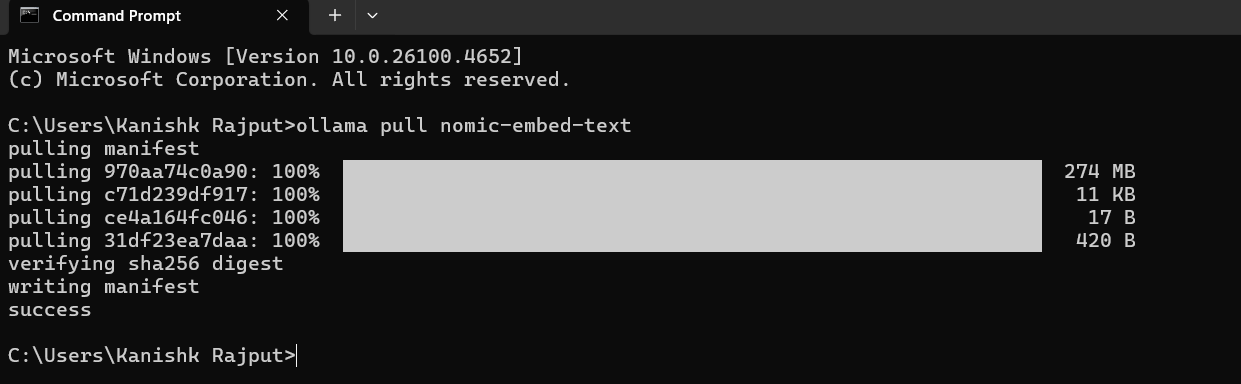

In [40]:
embedding = OllamaEmbeddings(model="nomic-embed-text")

In [43]:
# Build the Chroma vector store
db_books = Chroma.from_documents(
    documents,
    embedding=embedding
)

In [45]:
query = "A book to teach children about nature"
docs = db_books.similarity_search(query,k=10)
docs

[Document(id='e343fa13-26e7-48a8-832c-84ce29cbd98f', metadata={'source': 'tagged_description.txt'}, page_content='9780786808069.0 Children will discover the exciting world of their own backyard in this introduction to familiar animals from cats and dogs to bugs and frogs. The combination of photographs, illustrations, and fun facts make this an accessible and delightful learning experience.'),
 Document(id='da410ba8-cc17-4aa4-8227-ccbc127d02b2', metadata={'source': 'tagged_description.txt'}, page_content='9780786812912.0 In her first illustrated book for children, the Pulitzer Prize–winning author Toni Morrison introduces three feisty children who show grown-ups what it really means to be a kid.'),
 Document(id='c40181eb-1552-458d-bcc4-4e0a8a87e93a', metadata={'source': 'tagged_description.txt'}, page_content="9780786808380.0 Introduce your babies to birds, cats, dogs, and babies through fine art, illustration, and photographs. These books are a rare opportunity to expose little ones t

In [47]:
books[books['isbn13'] == float(docs[0].page_content.split()[0].strip())]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
3747,9.780787e+12,0786808063,Baby Einstein: Neighborhood Animals,Marilyn Singer;Julie Aigner-Clark,Juvenile Fiction,http://books.google.com/books/content?id=X9a4P...,Children will discover the exciting world of t...,2001.0,3.89,16.0,180.0,Baby Einstein: Neighborhood Animals,9780786808069.0 Children will discover the exc...


In [50]:
def retrieve_semantic_recommendations(
        query: str,
        top_k: int = 10,
) -> pd.DataFrame:
    recs = db_books.similarity_search(query, k = 50)

    books_list = []

    for i in range(0, len(recs)):
        books_list += [float(recs[i].page_content.strip('"').split()[0])]

    return books[books["isbn13"].isin(books_list)].head(top_k)

In [51]:
retrieve_semantic_recommendations("A book to teach children about nature")

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
85,9.780031e+12,0030547741,Where the Red Fern Grows,Wilson Rawls,Juvenile Fiction,http://books.google.com/books/content?id=IHpRw...,A young boy living in the Ozarks achieves his ...,2000.0,4.37,288.0,95.0,Where the Red Fern Grows: The Story of Two Dog...,9780030547744.0 A young boy living in the Ozar...
143,9.780061e+12,0060546573,Three Rotten Eggs,Gregory Maguire,Juvenile Fiction,http://books.google.com/books/content?id=t2pWl...,The students of Miss Earth's class in rural Ve...,2005.0,3.74,240.0,76.0,Three Rotten Eggs,9780060546571.0 The students of Miss Earth's c...
414,9.780064e+12,0064405958,Seven Spiders Spinning,Gregory Maguire,Juvenile Fiction,http://books.google.com/books/content?id=VPf_u...,"When seven Siberian snow spiders, frozen durin...",1995.0,3.61,144.0,259.0,Seven Spiders Spinning,9780064405959.0 When seven Siberian snow spide...
429,9.780064e+12,0064434982,The Deer in the Wood,Laura Ingalls Wilder,Juvenile Fiction,http://books.google.com/books/content?id=V7YDW...,Even the youngest child can enjoy a special ad...,1999.0,4.17,32.0,302.0,The Deer in the Wood,9780064434980.0 Even the youngest child can en...
436,9.780064e+12,0064471969,Shade's Children (rack),Garth Nix,Juvenile Fiction,http://books.google.com/books/content?id=_jlgl...,The Key to Survival Rests in the Hands of Shad...,1998.0,3.90,345.0,10368.0,Shade's Children (rack),9780064471961.0 The Key to Survival Rests in t...
442,9.780068e+12,006757520X,The Sense of Wonder,Rachel Carson,Nature,http://books.google.com/books/content?id=Zee5S...,"First published more than three decades ago, t...",1998.0,4.39,112.0,1160.0,The Sense of Wonder,9780067575208.0 First published more than thre...
549,9.780132e+12,013187165X,Astronomy,Eric Chaisson;Stephen McMillan,Mathematics,http://books.google.com/books/content?id=1O00A...,This introduction to astronomy features an exc...,2006.0,3.85,499.0,153.0,Astronomy: a beginner's guide to the universe,9780131871656.0 This introduction to astronomy...
568,9.780140e+12,0140139974,Sailor Song,Ken Kesey,Fiction,http://books.google.com/books/content?id=-pPSO...,"In Alaska to film a famous children's book, th...",1993.0,3.57,533.0,1956.0,Sailor Song,9780140139976.0 In Alaska to film a famous chi...
855,9.780143e+12,0143037390,The Read-aloud Handbook,Jim Trelease,Language Arts & Disciplines,http://books.google.com/books/content?id=B2_yU...,Explains the importance of reading aloud to ch...,2006.0,4.40,432.0,4122.0,The Read-aloud Handbook,9780143037392.0 Explains the importance of rea...
1638,9.780374e+12,0374299196,The Discomfort Zone,Jonathan Franzen,Biography & Autobiography,http://books.google.com/books/content?id=Z2vOA...,The author describes growing up in a family of...,2006.0,3.39,195.0,4660.0,The Discomfort Zone: A Personal History,9780374299194.0 The author describes growing u...
